In [1]:
import pandas as pb
import datetime
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
data = pb.read_csv("C:\\Users\\Windows10\\Desktop\\Machine Learning\\Covid Analysis\\covid_india_data.csv")
print(data)

       Sno      Date      Time         State/UnionTerritory  \
0      366  26/03/20   6:00 PM  Andaman and Nicobar Islands   
1      393  27/03/20  10:00 AM  Andaman and Nicobar Islands   
2      421  28/03/20   6:00 PM  Andaman and Nicobar Islands   
3      448  29/03/20   7:30 PM  Andaman and Nicobar Islands   
4      475  30/03/20   9:30 PM  Andaman and Nicobar Islands   
5      503  31/03/20   8:30 PM  Andaman and Nicobar Islands   
6      531  01/04/20   7:30 PM  Andaman and Nicobar Islands   
7      560  02/04/20   6:00 PM  Andaman and Nicobar Islands   
8      589  03/04/20   6:00 PM  Andaman and Nicobar Islands   
9      620  04/04/20   6:00 PM  Andaman and Nicobar Islands   
10     650  05/04/20   6:00 PM  Andaman and Nicobar Islands   
11     680  06/04/20   6:00 PM  Andaman and Nicobar Islands   
12     710  07/04/20   6:00 PM  Andaman and Nicobar Islands   
13     741  08/04/20   5:00 PM  Andaman and Nicobar Islands   
14     772  09/04/20   5:00 PM  Andaman and Nicobar Isl

In [2]:
plt.style.use('classic')
# plt.plot()

In [3]:
dat = data.to_numpy()
dates = []
for i in range(0,6286):
    dates.append(datetime.datetime.strptime(dat[i, 1], "%d/%m/%y"))
#     print(dates[-1].date())
dates = matplotlib.dates.date2num(dates)

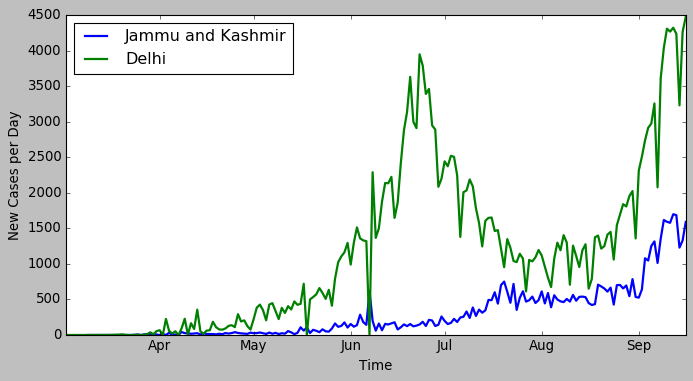

In [4]:
fig, ax = plt.subplots(figsize = (10,5))
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b'))
plt.plot_date(dates[dat[:,3] == 'Jammu and Kashmir'], dat[dat[:, 3] == 'Jammu and Kashmir'][:, -1], linestyle = 'solid', marker = 'None', linewidth = 2, label = "Jammu and Kashmir")
plt.plot_date(dates[dat[:,3] == 'Delhi'], dat[dat[:, 3] == 'Delhi'][:, -1], linestyle = 'solid', marker = 'None', linewidth = 2, label = "Delhi")
plt.xlabel("Time")
plt.ylabel("New Cases per Day")
plt.legend(loc = "upper left")
plt.show()

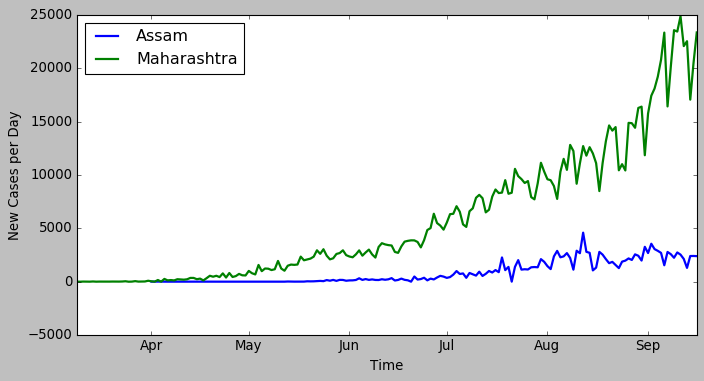

In [5]:
fig, ax = plt.subplots(figsize = (10,5))
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b'))
plt.plot_date(dates[dat[:,3] == 'Assam'], dat[dat[:, 3] == 'Assam'][:, -1], linestyle = 'solid', marker = 'None', linewidth = 2, label = "Assam")
plt.plot_date(dates[dat[:,3] == 'Maharashtra'], dat[dat[:, 3] == 'Maharashtra'][:, -1], linestyle = 'solid', marker = 'None', linewidth = 2, label = "Maharashtra")
plt.xlabel("Time")
plt.ylabel("New Cases per Day")
plt.legend(loc = "upper left")
plt.show()

In [6]:
dat_ = dat
dat = np.random.permutation(dat)
X = PolynomialFeatures(4).fit_transform(dat[:, 9:13])
Y = dat[:, -1]
print(X.shape)
print(Y.shape)

(6286, 70)
(6286,)


In [7]:
ratio = 6287 / 5 * 4
print(ratio)

5029.6


In [8]:
[X_train, X_test] = np.split(X, [5000])
print(X_train.shape)
print(X_test.shape)

(5000, 70)
(1286, 70)


In [9]:
[Y_train, Y_test] = np.split(Y, [5000])
print(Y_train.shape)
print(Y_test.shape)

(5000,)
(1286,)


In [10]:
print(X_train)
print(Y_train)
alphaset = [3e-12, 1e-11, 3e-11, 1e-10, 3e-10, 1e-9, 3e-9, 1e-8, 3e-8, 1e-7, 3e-7, 1e-6, 3e-6, 1e-5, 3e-5, 1e-4, 3e-4, 1e-3, 3e-3, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]

[[1.00000000e+00 1.86000000e+02 3.00000000e+00 ... 1.01812427e+20
  1.93928432e+19 3.69387489e+18]
 [1.00000000e+00 2.89700000e+03 2.36000000e+02 ... 1.11259424e+30
  2.91364217e+30 7.63019475e+30]
 [1.00000000e+00 3.09000000e+02 3.19000000e+02 ... 7.83665942e+29
  1.24284640e+30 1.97107859e+30]
 ...
 [1.00000000e+00 9.98000000e+02 2.69000000e+02 ... 5.99866814e+28
  2.99524700e+29 1.49558275e+30]
 [1.00000000e+00 5.38000000e+02 8.60000000e+01 ... 4.92593316e+21
  1.46580013e+22 4.36175230e+22]
 [1.00000000e+00 2.03870000e+04 8.59000000e+02 ... 7.75072523e+28
  8.49793509e+28 9.31717984e+28]]
[4 194 48 ... 110 31 2375]


In [11]:
linreg = LinearRegression(normalize = True).fit(X_train, Y_train)
print(linreg.score(X_train, Y_train))
print(linreg.score(X_test, Y_test))

0.9715885117015436
0.9777331742130034


In [12]:
ridgereg = RidgeCV(alphas = alphaset, normalize = True).fit(X_train, Y_train)
print(ridgereg.score(X_train, Y_train))
print(ridgereg.score(X_test, Y_test))

0.9715837884921825
0.9778159260849953


In [13]:
lassoreg = LassoCV(alphas = alphaset, cv = 5, tol = 0.05, normalize = True).fit(X_train, Y_train)
print(lassoreg.score(X_train, Y_train))
print(lassoreg.score(X_test, Y_test))

0.9532457325794559
0.9588420836424763


In [14]:
elasticreg = ElasticNetCV(l1_ratio = [.1, .5, .7, .9, .95, .99], alphas = alphaset, normalize = True, cv = 5, tol = 0.1).fit(X_train, Y_train)
print(elasticreg.score(X_train, Y_train))
print(elasticreg.score(X_test, Y_test))

0.9504622467516789
0.9562436277714639


In [15]:
predict_X = PolynomialFeatures(4).fit_transform(np.array([98555, 319, 23625962, 37469335]).reshape(1, -1))
# print(predict_X)
print(ridgereg.predict(predict_X))
print(lassoreg.predict(predict_X))

[8879.86382617]
[8928.89308611]


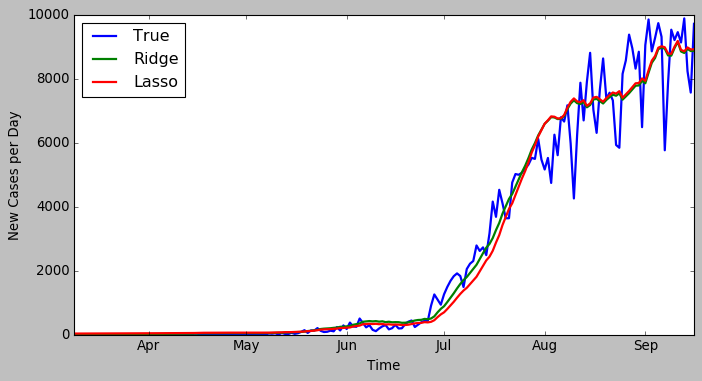

In [16]:
Y_ridge_predicted = ridgereg.predict(PolynomialFeatures(4).fit_transform(dat_[:, 9:13]))
Y_lasso_predicted = lassoreg.predict(PolynomialFeatures(4).fit_transform(dat_[:, 9:13]))

fig, ax = plt.subplots(figsize = (10,5))
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b'))
plt.plot_date(dates[dat_[:,3] == 'Karnataka'], dat_[dat_[:, 3] == 'Karnataka'][:, -1], linestyle = 'solid', marker = 'None', linewidth = 2, label = "True")
plt.plot_date(dates[dat_[:,3] == 'Karnataka'], Y_ridge_predicted[dat_[:, 3] == 'Karnataka'], linestyle = 'solid', marker = 'None', linewidth = 2, label = "Ridge")
plt.plot_date(dates[dat_[:,3] == 'Karnataka'], Y_lasso_predicted[dat_[:, 3] == 'Karnataka'], linestyle = 'solid', marker = 'None', linewidth = 2, label = "Lasso")
plt.xlabel("Time")
plt.ylabel("New Cases per Day")
plt.legend(loc = "upper left")
plt.show()

In [17]:
print(ridgereg.alpha_)
print(lassoreg.alpha_)

3e-11
3e-12
